In [270]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sn
import pandas as pd
from sklearn.model_selection import GridSearchCV,train_test_split
import numpy as np
import imblearn
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [271]:

zoo=pd.read_csv('Zoo.csv')
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


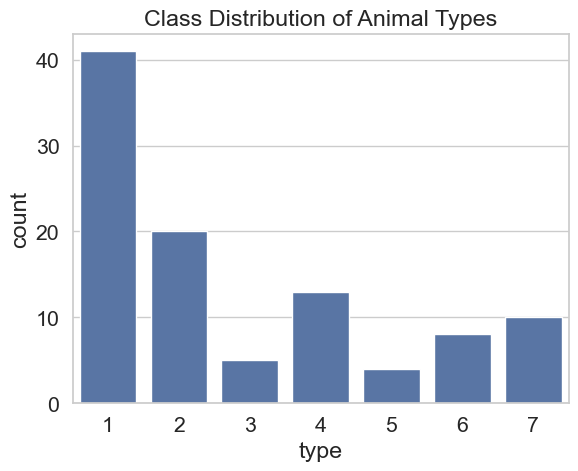

In [272]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='type', data=zoo)
plt.title('Class Distribution of Animal Types')
plt.show()

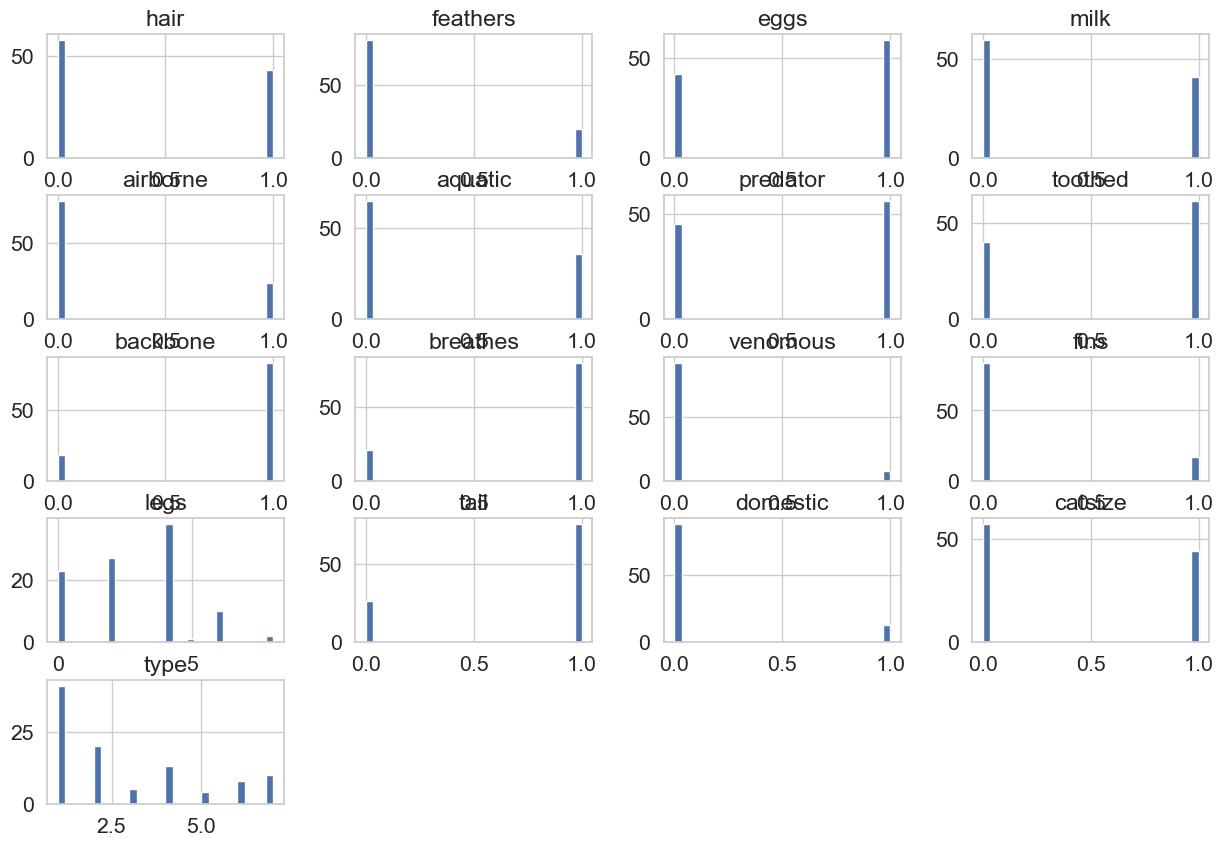

In [273]:
zoo.hist(bins=30, figsize=(15, 10))
plt.show()

In [274]:
zoo["type"].unique()

array([1, 4, 2, 7, 6, 5, 3])

In [275]:
#Data Pre processing
print(zoo.isnull().sum())

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


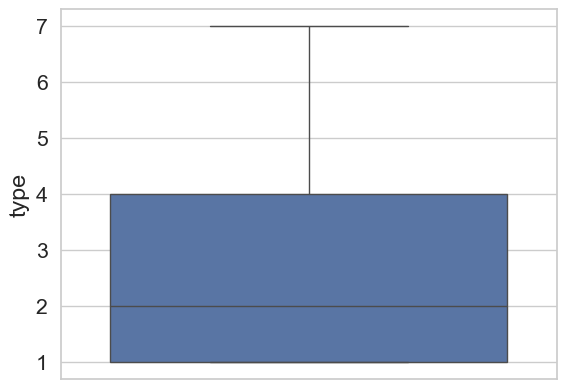

In [276]:
sns.boxplot(zoo['type'])
plt.show()

In [277]:
list(zoo)
zoo.shape
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [278]:
zoo[zoo.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [279]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [280]:
zoo = pd.get_dummies(zoo,columns=['legs'])

In [281]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,tail,domestic,catsize,type,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,0,1,1,False,False,True,False,False,False
1,antelope,1,0,0,1,0,0,0,1,1,...,1,0,1,1,False,False,True,False,False,False
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,0,4,True,False,False,False,False,False
3,bear,1,0,0,1,0,0,1,1,1,...,0,0,1,1,False,False,True,False,False,False
4,boar,1,0,0,1,0,0,1,1,1,...,1,0,1,1,False,False,True,False,False,False


In [282]:
zoo['type'].value_counts()

type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64

C:\Users\dhivya.dharani\AppData\Local\Temp\ipykernel_13940\1933270559.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(x = 'type', data = zoo, palette = 'Pastel1')


<Axes: xlabel='type', ylabel='count'>

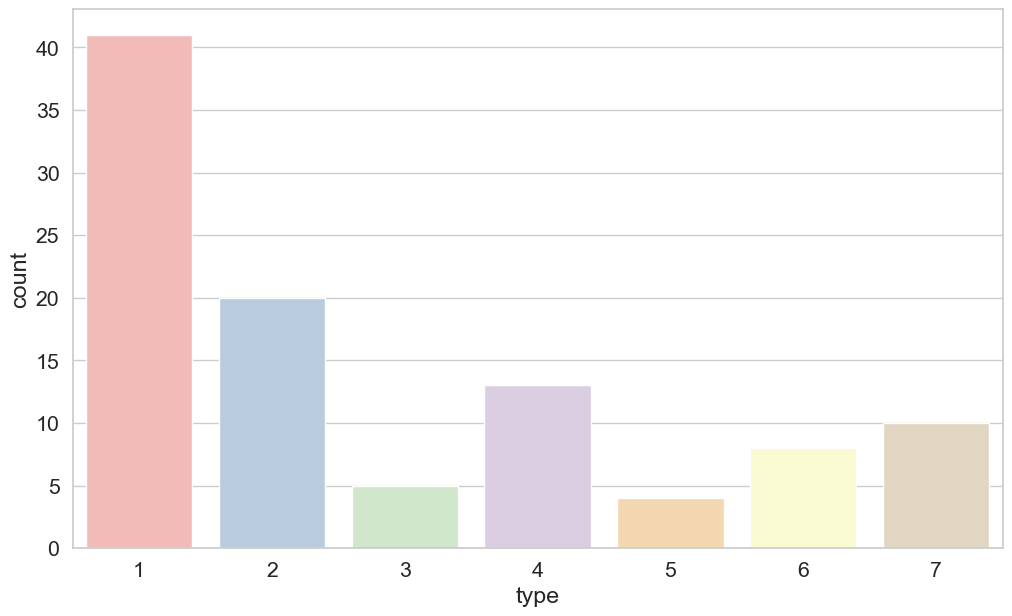

In [283]:
sn.set(style = 'whitegrid', font_scale = 1.4)
plt.subplots(figsize = (12,7))
sn.countplot(x = 'type', data = zoo, palette = 'Pastel1')

In [284]:
Y = zoo['type']
Y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [285]:
X = zoo.drop('animal name',axis=1)
X = X.drop('type',axis=1)
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,fins,tail,domestic,catsize,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,1,0,0,1,0,0,1,1,1,1,...,0,0,0,1,False,False,True,False,False,False
1,1,0,0,1,0,0,0,1,1,1,...,0,1,0,1,False,False,True,False,False,False
2,0,0,1,0,0,1,1,1,1,0,...,1,1,0,0,True,False,False,False,False,False
3,1,0,0,1,0,0,1,1,1,1,...,0,0,0,1,False,False,True,False,False,False
4,1,0,0,1,0,0,1,1,1,1,...,0,1,0,1,False,False,True,False,False,False


In [286]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state = 30, stratify = Y)

In [287]:
X_train.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,fins,tail,domestic,catsize,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
20,0,1,1,0,1,0,0,0,1,1,...,0,1,1,0,False,True,False,False,False,False
64,1,0,0,1,0,0,1,1,1,1,...,0,1,0,1,False,False,True,False,False,False
90,0,0,1,0,0,0,0,0,1,1,...,0,1,0,1,False,False,True,False,False,False
59,0,1,1,0,1,0,0,0,1,1,...,0,1,0,0,False,True,False,False,False,False
30,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,False,False,False,False,True,False


In [288]:
Y_train.head()

20    2
64    1
90    3
59    2
30    6
Name: type, dtype: int64

In [289]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [290]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=10)
grid.fit(X_train, Y_train)
print(grid.best_params_)

c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


{'n_neighbors': np.int64(1)}


c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\

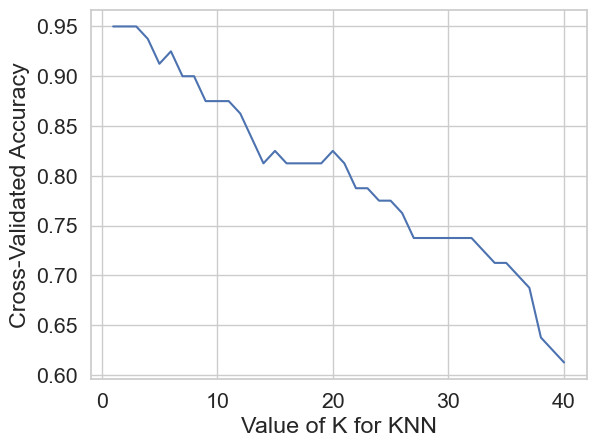

In [291]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [292]:
model = KNeighborsClassifier(n_neighbors =1).fit(X_train,Y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
print(accuracy)

0.9523809523809523


In [293]:
confusion_matrix = confusion_matrix(Y_test,y_pred)
print (confusion_matrix)

[[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]


In [294]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         3
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.79      0.86      0.81        21
weighted avg       0.93      0.95      0.94        21



c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [295]:
ros = RandomOverSampler(random_state = 30)

In [296]:
x_resample, y_resample = ros.fit_resample(X, Y)
y_df = pd.DataFrame(y_resample)

In [297]:
y_df.value_counts()

type
1       41
2       41
3       41
4       41
5       41
6       41
7       41
Name: count, dtype: int64

In [298]:
X_train, X_test, Y_train, Y_test = train_test_split(x_resample, y_resample, test_size = .2, random_state = 30, stratify = y_resample)

In [299]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=10)
grid.fit(X_train, Y_train)
print(grid.best_params_)

{'n_neighbors': np.int64(1)}


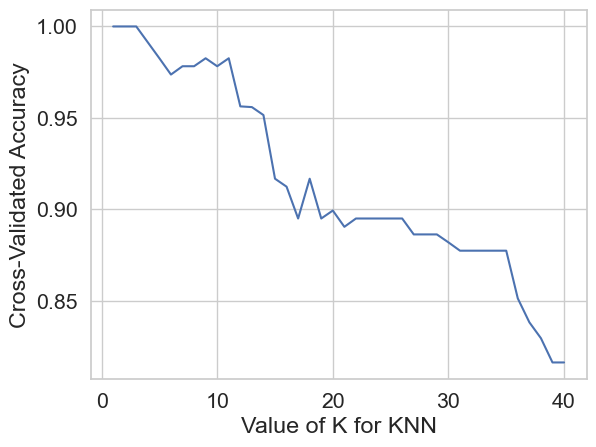

In [300]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [301]:
model = KNeighborsClassifier(n_neighbors =1).fit(X_train,Y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
print(accuracy)

1.0


In [302]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,y_pred)
print (confusion_matrix)

[[8 0 0 0 0 0 0]
 [0 8 0 0 0 0 0]
 [0 0 8 0 0 0 0]
 [0 0 0 8 0 0 0]
 [0 0 0 0 8 0 0]
 [0 0 0 0 0 9 0]
 [0 0 0 0 0 0 9]]


In [303]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         9

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



In [306]:
from sklearn.metrics import classification_report, accuracy_score


print("Classification Report:\n", classification_report(Y_test, y_pred))

# Calculate accuracy score
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: ", accuracy)

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         9

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58

Accuracy:  1.0


Interview Questions

1. What are the key hyperparameters in K-Nearest Neighbors (KNN)?
The key hyperparameters in the K-Nearest Neighbors (KNN) algorithm include:

n_neighbors (K):

This is one of the most important hyperparameters in KNN. It represents the number of nearest neighbors to consider when making a classification or regression prediction. A smaller k leads to a model that is more sensitive to noise, while a larger k leads to smoother decision boundaries but may underfit the model.

weights:

This determines how the neighbors' votes are weighted when predicting the class or value. It has two main options:
'uniform': All neighbors contribute equally to the prediction.
'distance': Closer neighbors are given more weight (i.e., their contribution is weighted by the inverse of their distance).

algorithm:

This defines the algorithm used to compute the nearest neighbors. The options are:
'auto': The algorithm selects the best method based on the dataset.
'ball_tree': Builds a Ball Tree, which is a binary tree structure used to partition the feature space for fast nearest neighbor searches.
'kd_tree': Uses a k-d tree (k-dimensional tree), another data structure for fast nearest neighbor search.
'brute': A brute-force search for nearest neighbors.

leaf_size:

This is relevant when using the 'ball_tree' or 'kd_tree' algorithms. It controls the size of the leaf nodes in the tree data structures. Smaller values typically make the model more accurate but slower, while larger values can speed up the search but reduce accuracy.

metric:

This defines the distance metric used to calculate distances between points. Common choices include 'euclidean', 'manhattan', 'chebyshev', and others (discussed below).

p:

This is a parameter that determines the power parameter for the Minkowski distance (when the metric is Minkowski). It specifies the distance function to use:
p = 1 corresponds to the Manhattan distance.
p = 2 corresponds to the Euclidean distance.
Any other value of p results in the Minkowski distance.

n_jobs:

This specifies the number of parallel jobs to run for neighbors search. If -1, it uses all available processors.

2. What distance metrics can be used in KNN?

In K-Nearest Neighbors (KNN), different distance metrics can be used to measure how close two data points are. The most common metrics are:

Euclidean Distance (most common):

This is the straight-line distance between two points in Euclidean space. It is the default distance metric for KNN.

Manhattan Distance (or L1 distance):

This measures the absolute distance between two points, summing the absolute differences of their coordinates. It is often used when the data has a grid-like structure.

Minkowski Distance:

This is a generalization of both Euclidean and Manhattan distance

Chebyshev Distance:

This measures the greatest difference along any single dimension. It is useful when you're dealing with a grid-like layout.

Cosine Similarity:

Cosine similarity measures the cosine of the angle between two vectors, commonly used in text classification tasks. It works well when you care more about the direction (angle) rather than the magnitude.

Hamming Distance:

This measures the number of positions at which the corresponding elements are different (used mainly for categorical variables).